# Stock Manipulation Proof Performance Measure (MPPM) Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-03-01' #input
symbol = '^GSPC' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
# risk free
rf = yf.download('BIL', start=start, end=end)['Adj Close'].pct_change()[1:]

[*********************100%***********************]  1 of 1 completed


In [5]:
stock_returns = stocks.pct_change().dropna()

In [6]:
def mppm_stock(stock_returns, rf):
    T = len(stocks)
    gamma = stock_returns.std() #risk aversion
    equation1 = 1.0 / (1.0 - gamma)
    mppm = equation1 * math.log(1.0/T * (np.sum(((1.0 + stock_returns)/ (1+rf))**(1-gamma))))
    return mppm

Text(0, 0.5, 'Manipulation Proof Performance Measure')

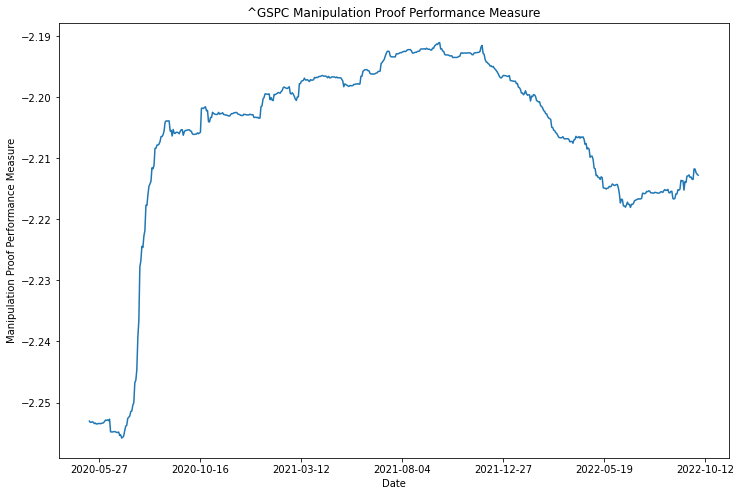

In [7]:
# Compute the running Manipulation Proof Performance Measure
running = [mppm_stock(stock_returns[i-90:i], rf[i-90:i]) for i in range(90, len(stock_returns))]

# Plot running Manipulation Proof Performance Measure up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stock_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Manipulation Proof Performance Measure')
plt.xlabel('Date')
plt.ylabel('Manipulation Proof Performance Measure')

In [8]:
mppm_stock = mppm_stock(stock_returns, rf)
mppm_stock

-0.0009351922112065884

In [9]:
running

[-2.2530429398082488,
 -2.2532530169037246,
 -2.25322077232718,
 -2.2531511640310597,
 -2.2532536126253246,
 -2.2534605287225586,
 -2.253360145960327,
 -2.2535231383197125,
 -2.253482188385774,
 -2.2534296485345,
 -2.253416037817275,
 -2.2534772364510642,
 -2.253402186944989,
 -2.253371574763394,
 -2.2533199196537903,
 -2.253112387437168,
 -2.252880059797726,
 -2.2529279726571088,
 -2.25283821956692,
 -2.2529828284623825,
 -2.252730066753473,
 -2.254808764866444,
 -2.2548111102555692,
 -2.2548181162505014,
 -2.254782202657966,
 -2.2547561408049406,
 -2.254809121022323,
 -2.254899135583733,
 -2.2548977246545614,
 -2.254838061705745,
 -2.2553954384275263,
 -2.2552897382701014,
 -2.25581605377202,
 -2.2556971717974035,
 -2.2554633088160023,
 -2.2546120989164304,
 -2.253867724754692,
 -2.253728030410941,
 -2.252613119337857,
 -2.252417658219033,
 -2.2522067161646766,
 -2.2514769789907088,
 -2.251405080399262,
 -2.2504531318786696,
 -2.250051774738251,
 -2.2467696987322645,
 -2.246347841433